# TP1 son 
## Hocine ABDELHAMID 
### M2 ISI, 21100727
----

### TP1 : propagation of a sound wave and acquisition with a microphone array

In this tutorial, we will study the sound wave we get on output when the microphone are in an array configuration.


### 1.1 preparation
1. Express $z_n$ as a function of the spacing d between the microphones.

On a directement : 
$$z_n = d\times(n - \frac{N}{2}) - \frac{d}{2}$$



### 1.1.1 Wave Front

#### Assumption 1 : the wave front is assumed to be a plane, cf. Fig1.
2. Express $d_n$ as a function of $z_n$ and the angle  $\theta _s$ , which is the angle of incidence defined
with respect to the axis [O, z] of the microphone array.
<img src= "images/Fig1.png">

$$d_n = -z_n\times cos(\theta _s)$$

this distance can either be positive or negative, depending on what microphone. A negative $d_n$ would represent a microphone that is closer from the source from the origin



3. Deduce the angle of incidence  $\theta _s$ , as a function of the delay $\delta _{\tau _n}$ 

as we have $d_n$, we know that $\delta _{\tau _n}  = \frac{d_n}{c}$ where c, is the sound celerity
$$\delta _{\tau _n}  = \frac{d_n}{c} = \frac{-z_n\times cos(\theta _s)}{c}$$
$$\theta _s = Arccos(-\frac{\delta _{\tau _n}c}{z_n})


### Assumption 2 : the wave front is assumed to be spherical, cf. Fig2.
4. Express the (Cartesian) coordinates of the source ($x_s$ , $z_s$ ) as a function of the distance $r_s$ between the source and the centre of the microphone array, the position of the $n_{th}$ microphone $z_n$ , the distance $d_n$ and the angles  $\theta _s$ and $d_n$ , the angle between the wave arriving at the $n_{th}$ microphone and that arriving at O.

here $d_n$ isn't equal to $d_n = z_n\times cos(\theta _s)$ anymore

we have :
$$z_n  = (r_s + d_n)\times sin(\alpha _s + d\alpha _n) + z_n$$
$$x_n  = (r_s + d_n)\times cos(\alpha _s + d\alpha _n)$$


In [1]:
# All required import
import matplotlib.pyplot as plt
import ipywidgets as widgets
import numpy as np
from client import array
import time
from utils import * 
#%matplotlib notebook
%matplotlib ipympl
# Faire la phase en f0, calculer le déphasage, retrouver delta _t .

In [2]:
# Case qui permet l'acquisiton et l'enrigistremetn
antenne=array('server') 

In [2]:
# m = antenne = array("play")

# Au lieu de rejouer le fichier antenne a chaque fois avec array("play") (ce qui est long et nécessite de restart le kernel a cause d'un bug)
# On va enregistrer le premier buffer de chaque fichier h5 grace a la fonction suivante dans utils.py

# save_folder_of_h5files_as_dict(folder_path="50cm_lateral", save_destination="matrices")

# Il nous suffit ensuite de load le dictionnaire grace a np.load(picke= true)

# 2eme facon de faire : 

# antenne100 = load_antenne("50cm_lateral/100.h5")
# qui charge tout simplement l'antenne sans passer par le gui


### 1.2.2 Speed of sound

On charge dans un premier temps , le fichier à 100 Hz

In [5]:
#Fichier a 100 Hz
# antenne100 = np.load("matrices/100.npy", allow_pickle= True).item()
# m = antenne100['mat']
# Fs = antenne100['fs']
# BLK = antenne100['blocksize']
# N = antenne100['N']
# d = antenne100['interspace']

antenne100 = load_antenne("50cm_lateral/100.h5")
m100 = antenne100.read()
Fs = antenne100.fs 

{'50cm_lateral/100.h5': {'analogs': array([], dtype=float64), 'analogs_number': 0, 'channels_number': 8, 'comment': '', 'compression': False, 'counter': False, 'counter_skip': False, 'dataset_duration': 1, 'dataset_length': 20000, 'dataset_number': 2, 'datatype': 'int32', 'date': '2022-11-16 11:45:42.921823', 'duration': 2, 'mems': array([16, 17, 18, 19, 20, 21, 22, 23]), 'mems_number': 8, 'sampling_frequency': 20000.0, 'timestamp': 1668595542.921823}}


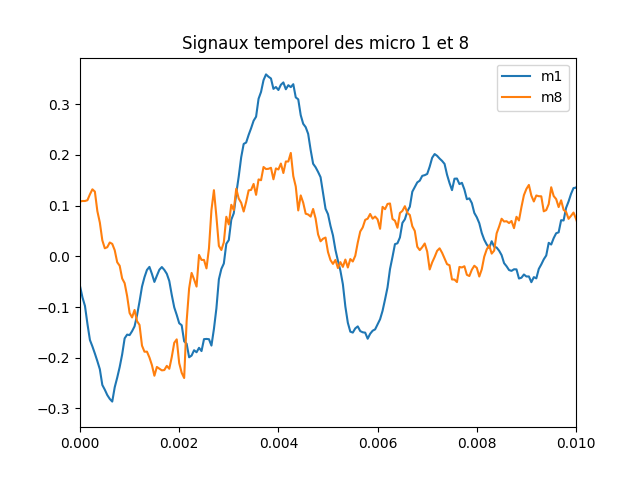

In [9]:
# Affichage du isgnal
def trace_m1_m8(m, xmax = 0.01, s = '', Fs= 20000):
    t = [i/Fs for i in range(m.shape[1])]
    plt.figure()
    for i in [0,7]:
        plt.plot(t,m[i], label= f"m{i +1}")
    plt.legend()
    plt.title(f'Signaux temporel des micro 1 et 8 {s}')
    plt.xlim((0,xmax))
    plt.xlabel("t (s)")
    plt.ylabel("x")
trace_m1_m8(m100, xmax = 0.01)


Le signal est plutot bruité, mais il sera possible de retrouver la vitesse du son comme on le verra par la suite

On trace le module de la transformé de fourrier ainsi que la phase pour les micros 1 et 8

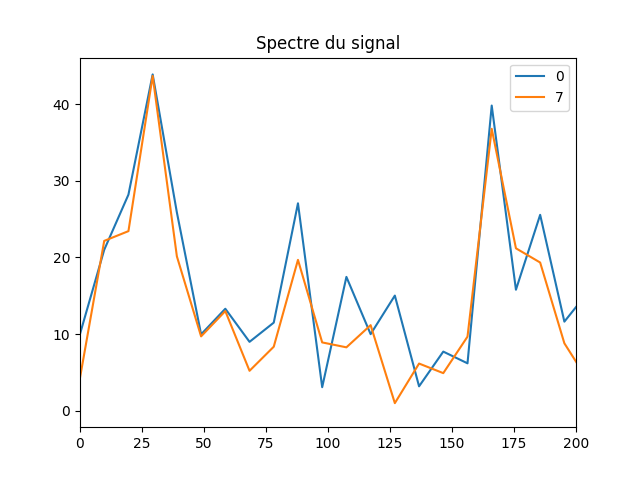

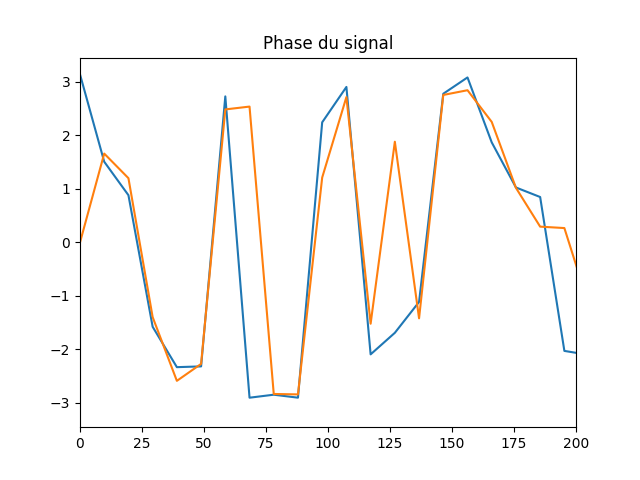

In [10]:
mics = [0,7]

for i in mics:
    # fourier, fonction défini dans utils.py
    fourier(m100[i], Fs,i, "modulus", newFig = not i, limaxis = (0,200))
plt.legend()
for i in mics:
    fourier(m100[i], Fs, i, "phase", newFig = not i, limaxis = (0,200))


5. Measure the time needed by the wave to travel the distance between the microphones,
using :

— (a) the observation of the waveform

— (b) the phase of the spectra.
6. Deduce the speed of sound propagation, also known as the celerity. Compare with the
theoretical value at room temperature.

a) On observe le déphasage entre les deux signaux temporelle, on recueille le temps t pour lesquel lees signaux sont dans la meme configurations.
    il suffit ensuite de faire v = (d*7)/(t2-t1)

<img src= "images/WF_100hz.png"/>

En s'attardant sur le deux premiers pics on a : </br>
t2 = 0.00150s </br>
t1 = 0.0002s </br>
En faisant le calcul on trouve v = 323m/s  ce qui semble plutot correte en comparaison des 340m/s théorique à température ambiante</br>

b) On observe le déphasae en f0 = 100hz, on peut ensuite retrouver le retard : $\Delta t = \frac{\Delta \phi}{2 \pi f_0}$ </br>
a 100hz on a : </br>
<img src="images/p100hz.png"/>

$\phi _1 = 2.396$ </br>
$\phi _2 = 1.565$ </br>
donc $\Delta \phi  = 0.831$ et $\Delta t = 1.322e-3$

on trouve alors v = $\frac{0.06*7}{\Delta t}$ = 317m/s 
ce qui est encore assez proche de la vitesse théorique a temperature ambiante



7. Repeat the previous steps with a white noise sound source

In [19]:
antenne_noise = load_antenne("white_noise.h5")
m_noise = antenne_noise.read()


{'white_noise.h5': {'analogs': array([], dtype=float64), 'analogs_number': 0, 'channels_number': 8, 'comment': '', 'compression': False, 'counter': False, 'counter_skip': False, 'dataset_duration': 1, 'dataset_length': 20000, 'dataset_number': 2, 'datatype': 'int32', 'date': '2022-11-16 12:39:54.343849', 'duration': 2, 'mems': array([16, 17, 18, 19, 20, 21, 22, 23]), 'mems_number': 8, 'sampling_frequency': 20000.0, 'timestamp': 1668598794.343849}}


/tmp/ipykernel_50872/860593704.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


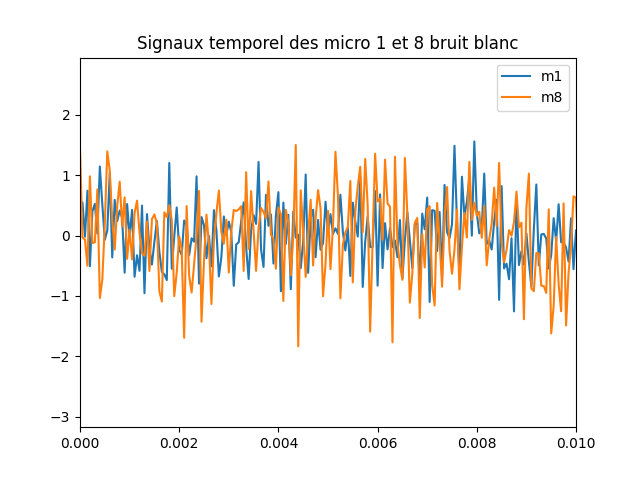

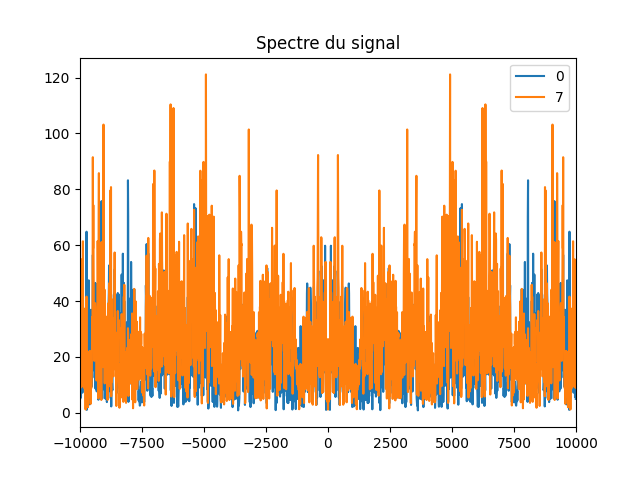

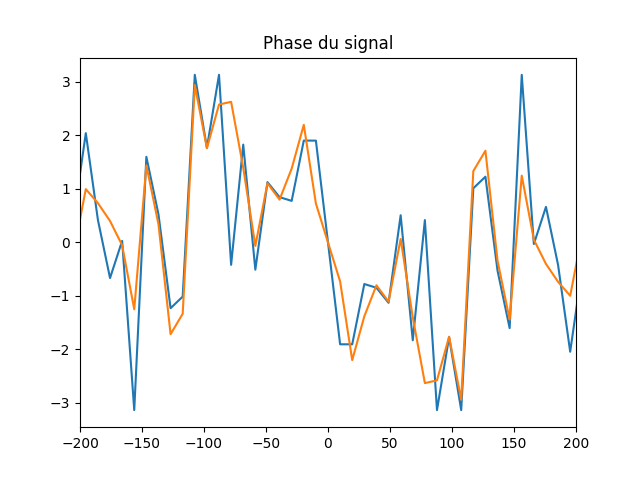

In [20]:
trace_m1_m8(m_noise, 0.01, "bruit blanc")
mics = [0,7]

for i in mics:
    # fourier, fonction défini dans utils.py
    fourier(m_noise[i],Fs,i, "modulus", newFig = not i, limaxis = (-10000,10000))
plt.legend()
for i in mics:
    fourier(m_noise[i], Fs, i, "phase", newFig = not i, limaxis = (-200,200))

8. Discuss and compare the accuracy of the three methods tested above.


Pour la méthode a), il suffit de détermeienr le retard qu' a la courbe du micro 7 par rapport a celle du micro 1. Cette méthode à l'aventage d'être rapide a éxectuer, et direct. cependant, on ne peut atteindre une bonne précision notemment à cause du bruit environnant qui rend difficile la lecture du retard entre les signaux.

Pour la méthode b), il suffit de déterminer le déphasage entre les deux signaux à la fréquence f0 grace a la transformée de fourier.
La phase est plus lisse et plus facile a lire, et cela augmente la précision de la mesure.

pour la méthode du bruit blanc : pas encore réussi.





9. Repeat the previous steps at a frequency of 3 kHz

In [27]:
# cette fonction lit le fichier h5 directement depuis le path
antenne3000 = load_antenne("50cm_lateral/3000.h5")
m3000 = antenne3000.read()

{'50cm_lateral/3000.h5': {'analogs': array([], dtype=float64), 'analogs_number': 0, 'channels_number': 8, 'comment': '', 'compression': False, 'counter': False, 'counter_skip': False, 'dataset_duration': 1, 'dataset_length': 20000, 'dataset_number': 6, 'datatype': 'int32', 'date': '2022-11-16 09:34:27.318821', 'duration': 6, 'mems': array([16, 17, 18, 19, 20, 21, 22, 23]), 'mems_number': 8, 'sampling_frequency': 20000.0, 'timestamp': 1668587667.318821}}


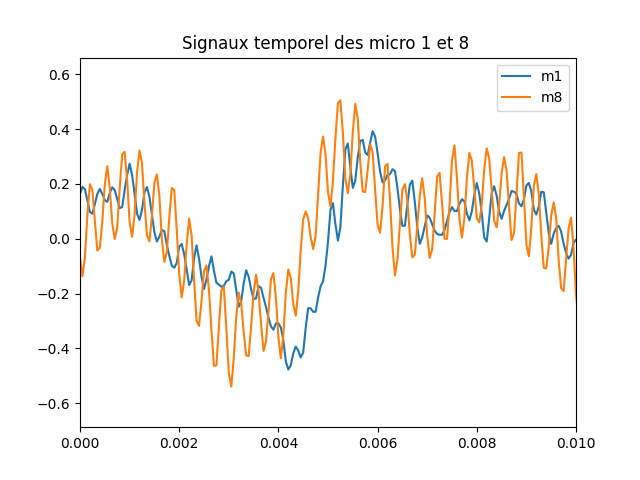

In [28]:

trace_m1_m8(m3000, 0.01)

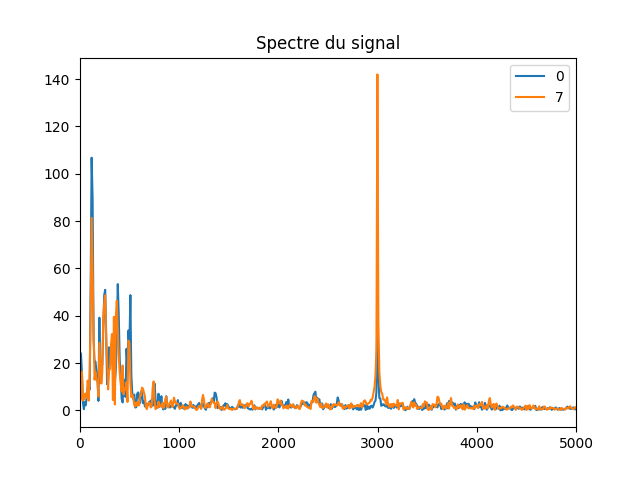

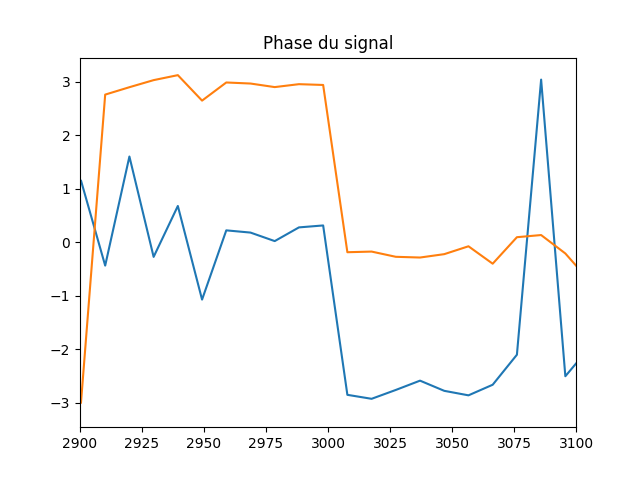

In [29]:
mics = [0,7]

for i in mics:
    # fourier, fonction défini dans utils.py
    fourier(m3000[i], Fs,i, "modulus", newFig = not i, limaxis = (0,5000))
plt.legend()
for i in mics:
    fourier(m3000[i], Fs, i, "phase", newFig = not i, limaxis = (2900,3100))


10. Use the first two methods described above - using a pure tone in the time domain (a) and in the frequency domain (b) - to estimate the speed of sound. Interpret the results obtained

<img src="images/WF_3000hz.png"/>

On observe un pic en y2 = 0.0042 un autre en t1 = 0.0027 qui nous donne  v = 280m/s </br>
On est dans le bon ordre de grandeur cependant c'est un coup de chance, on verra par la suite que cette fréquence est au dessus de flim, la fréquence a laquelle il n'est plus possible de déterminer le délai entre les deux ondes acoustiques. On le voit également jusee après lorsqu'on essaye de détrminer le délai grace au déphasage.

Le module de latransformée de fourier donne un bon pic en 3000, et on a evidemment du bruit dans les basses fréquences qui provient par exemple de nos camarades qui parlaient pendant nos acquisitions.

La phase nous donne, si on zoom sur f = 3000 : </br>
$\phi _1 = -1.36$  </br>
$\phi _2 = 0.88$ </br>
donc $\Delta \phi  = 2.24$ et $\Delta t = 1.18e-4$

on trouve alors v = $\frac{0.06*7}{\Delta t}$ = 3472m/s 

La fréquence f0 est trop grande pour déterminer v correctement


11. Deduce the limit frequency above which it is no longer possible to determine the delay between the acoustic waves measured. In the following, this limit frequency is noted flim.

Avec une fréquence trop élevée il devient impossible de déterminer le retard entre les deux signaux.</br>

En effet on a $\nu = \frac{c}{\lambda}$ avec $\lambda$ la longueur d'onde le l'onde acoustique.</br>
La longueur d'onde correspond à la distance parcouru par l'onde pendant une période.
On sait que théoriquement c = 340m/s à température ambiante.</br>
ainsi $\lambda = \frac{c}{v}$, plus la fréquence $\nu$ est grande, plus $\lambda$ est petit. </br>
si la longueur d'onde est plus petite que la distance séparant les deux micros 1 et 7, il est impossible de de déterminer le délai entre les deux ondes acoustiques.</br>
en effet il y aura plusieurs periodes en une ce qui rendra la bonne lecture impossible.



d_17 = 0.06*7 = 0.42m</Br>
$f_{lim} = \frac{c}{0.42}$ = 809 hz 





### 1.2.3 Radiation from the source
12. Place the source in the axis of one microphone of the array, as close as possible ( 1 cm) to the microphone capsule and directed towards the microphone under consideration. Generate a pure tone below the limit frequency. Display the recorded waveform and calculate its RMS value.



In [12]:
# 500hz 1cm placé deant le micro 4 (central)
a_500_1= load_antenne("500hz_front/500hz_001cm.h5")
m_500_1 = a_500_1.read()


{'500hz_front/500hz_001cm.h5': {'analogs': array([], dtype=float64), 'analogs_number': 0, 'channels_number': 8, 'comment': '', 'compression': False, 'counter': False, 'counter_skip': False, 'dataset_duration': 1, 'dataset_length': 20000, 'dataset_number': 2, 'datatype': 'int32', 'date': '2022-11-18 17:30:51.078725', 'duration': 2, 'mems': array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32), 'mems_number': 8, 'sampling_frequency': 20000.0, 'timestamp': 1668789051.078725}}


The RMS value is 3.9761689561914313


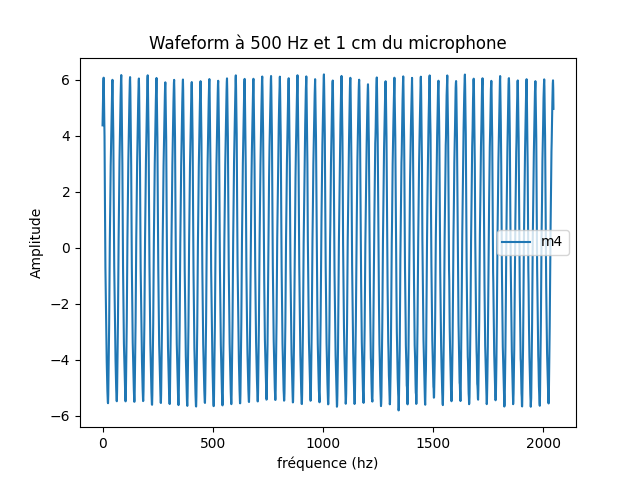

In [25]:
m_500_1 = a_500_1.read()
plt.figure()
plt.plot(m_500_1[4], label = "m4")
plt.xlabel("fréquence (hz)")
plt.ylabel("Amplitude")
plt.title("Wafeform à 500 Hz et 1 cm du microphone")

plt.legend()

def RMS(x):
    n = len(x)
    return (np.sum(x**2)/n)**0.5

print(f"The RMS value is {RMS(m_500_1[4])}")


13. Increase the distance between the source and the microphone under consideration. Repeat the above steps for diﬀerent values of this distance. NB : For each value, make sure that the same "sound volume" is not modified at the source interface.

In [7]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
import numpy as np
import time
from client import array
import glob
from utils import *
#%matplotlib notebook
%matplotlib ipympl

In [2]:
def RMS(x):
    n = len(x)
    return (np.sum(x**2)/n)**0.5
# On sauvegarde en amont dans des fichier npy car sinon on est obligé de restart le kernel
path = glob.glob("500hz_front/*")
print(path)
a = load_antenne(path[3])
m = a.read()
# np.save("500hz_front_savednpy/100cm", m)
print(RMS(m[4]))

NameError: name 'glob' is not defined

RMS de : 3.9897229902625355
RMS de : 0.25940495375178396
RMS de : 0.18741424690583638
RMS de : 0.19803933241617858


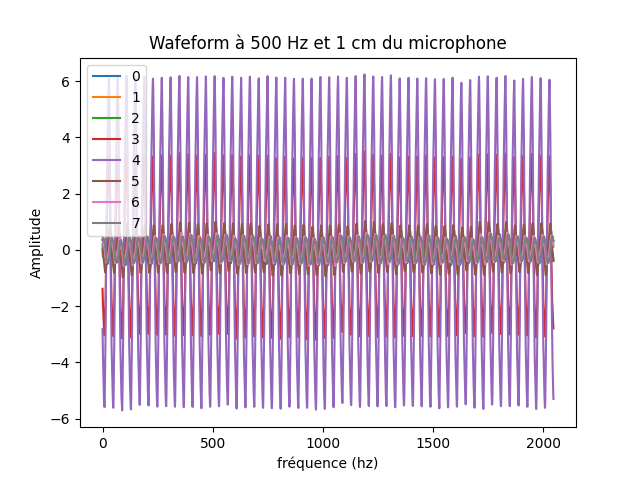

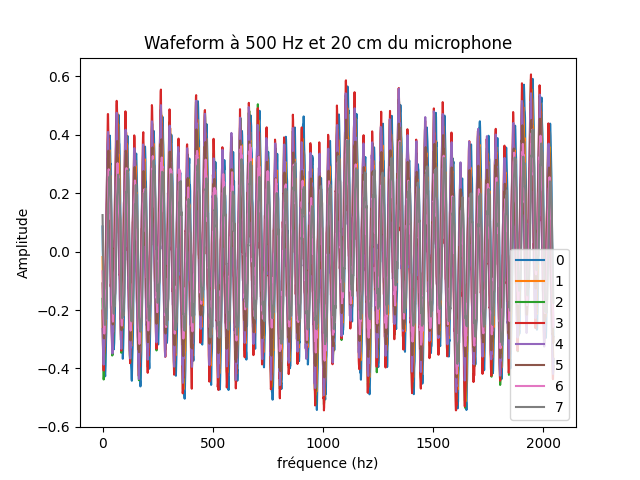

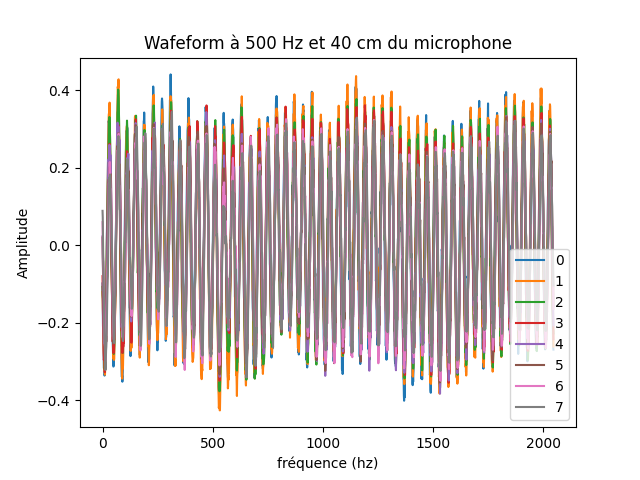

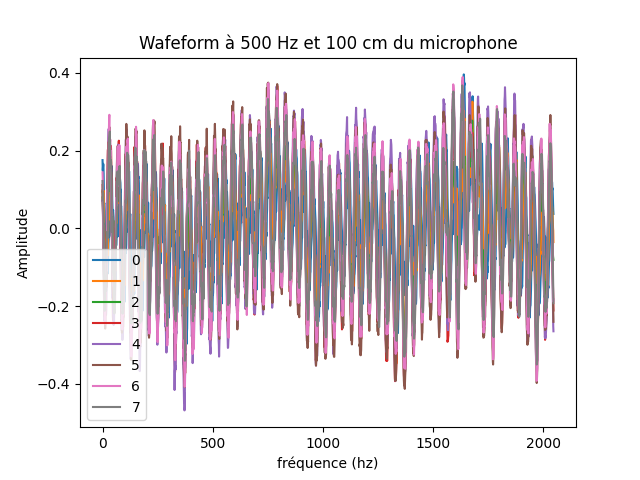

In [9]:
path = glob.glob("500hz_front_savednpy/*")
distances =[]
RMS_tab  = []
for p in path:
    dist  = p[::-1]
    cind = dist.index('c')
    _ind = dist.index('/')
    dist = int(dist[cind +1: _ind][::-1])
    distances.append(dist)

    mc = np.load(p)

    rootMS = RMS(mc[4]) 
    RMS_tab.append(rootMS)
    plt.figure()
    for i in range(len(mc)):
        plt.plot(mc[i], label = i)
    plt.xlabel("fréquence (hz)")
    plt.ylabel("Amplitude")
    plt.title(f"Wafeform à 500 Hz et {dist} cm du microphone")
    plt.legend()
    print(f"RMS de : {rootMS}")





14. Plot the RMS values as a function of the distance between the sound source and the microphone under consideration.

Text(0.5, 1.0, 'RMS en focntion de la distance en cm')

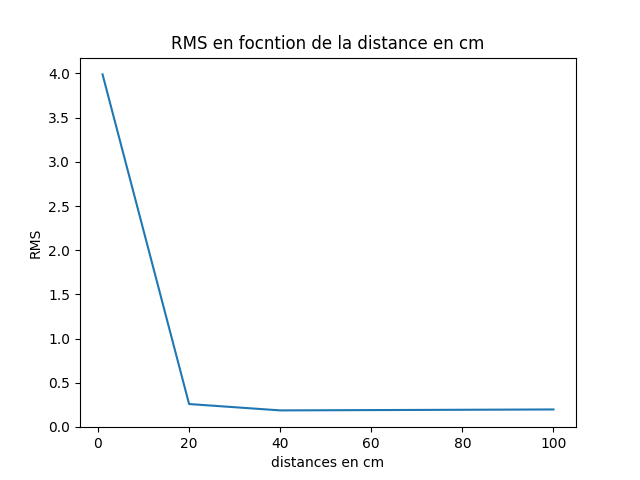

In [10]:
plt.figure()
plt.plot(distances, RMS_tab)
plt.xlabel("distances en cm")
plt.ylabel("RMS")
plt.title("RMS en focntion de la distance en cm")

15. Interpret the shape of this curve.

Nous n'avons malheureusemtn pas eu le temps de predre assez de mesure pour la RMS </br>
Il est cependant normal que la RMS baisse étant donné que  on s'éloigne du micro, l'amplitude du son est moins grande </br>
on voit que la RMS tend vers une certaines valeur qui correspond au bruit environnant de la salle